<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Car Price Prediction using classes </strong></center>

</div>

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> imports </strong></center>

</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats.mstats import normaltest
import copy
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Read Data </strong></center>

</div>

In [2]:
data=pd.read_csv('/kaggle/input/carprice-dataset/CarPrice_Assignment.csv')

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Analyze data </strong></center>

</div>

In [3]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
############ Number of null values #######################

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## No Null values found

############## Check for duplicates ###########################

In [7]:
data.duplicated(subset='car_ID')==0

0      True
1      True
2      True
3      True
4      True
       ... 
200    True
201    True
202    True
203    True
204    True
Length: 205, dtype: bool

####### Process the CarName  ################

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Process the data </strong></center>

</div>

In [8]:
data['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [9]:
data['CarName'].describe()

count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object

In [10]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
#### Split the Company Name from CarName column ################

In [12]:
data['CarName'].str.split(' ').str.get(0).str.lower()

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [13]:
data['brand']=data['CarName'].str.split(' ').str.get(0).str.lower()

In [14]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
data['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

In [17]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
type(data.brand)

pandas.core.series.Series

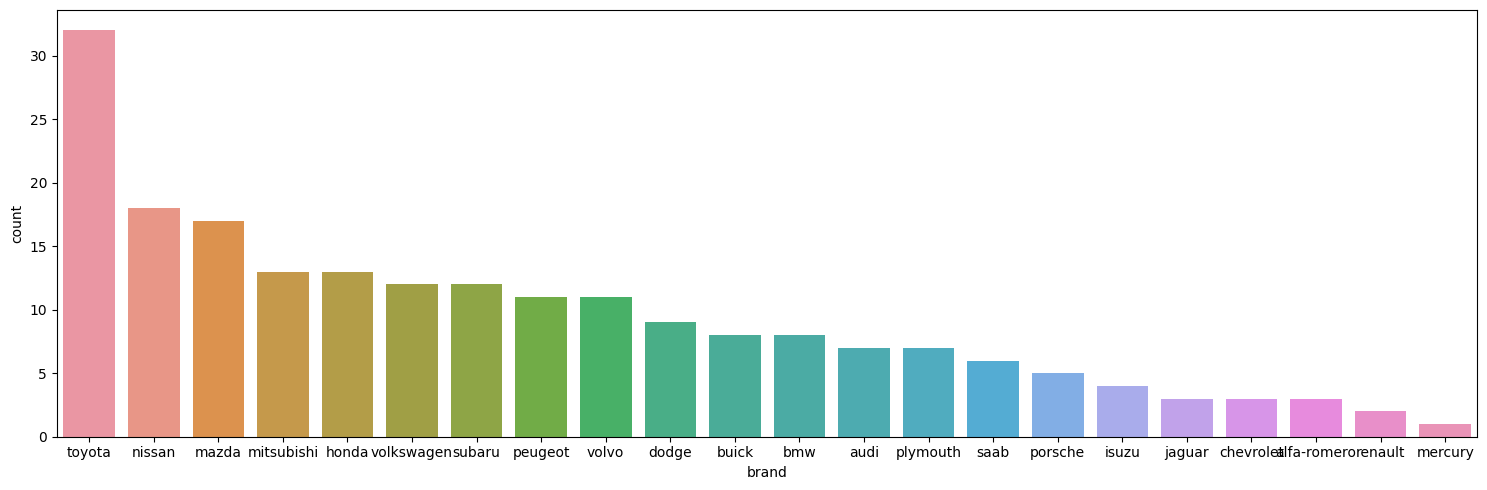

In [19]:
fig,ax=plt.subplots(figsize=(15,5))
plt1=sns.countplot(x=data['brand'], order=data['brand'].value_counts().index)
plt.tight_layout()

In [20]:
### Drop CarID, symboling and CarName columns ########

In [21]:
data.drop(['car_ID','symboling','CarName'],axis=1,inplace=True)

In [22]:
data.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [24]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [25]:
data['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Feature Engineering </strong></center>

</div>

In [26]:
### Find three category of prices Budget, Mid-range, Luxury Cars ######################

In [27]:
df_avg_price=data[['brand','price']].groupby('brand',as_index=False).mean().rename(columns={'price':'brand_avg_price'})

In [28]:
df_avg_price.head(5)

,brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000


In [29]:
data=data.merge(df_avg_price,on='brand')

In [30]:
data.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714


In [31]:
data['brand_category']=data['brand_avg_price'].apply(
    lambda x : "Budget" if x<10000 else ("Mid_Range" if 10000 <=x < 20000 else "Luxury")
)

In [32]:
data.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Mid_Range
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Mid_Range
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Mid_Range
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Mid_Range
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Mid_Range


<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Exploratory Data Analysis </strong></center>

</div>

In [33]:
categorical_columns=data.select_dtypes(include=['category','object']).columns.tolist()

In [34]:
categorical_columns

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand',
 'brand_category']

In [35]:
data_categorical_columns=data[categorical_columns]

In [36]:
data_categorical_columns.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,brand_category
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,Mid_Range
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,Mid_Range
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,Mid_Range
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,Mid_Range
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,Mid_Range


<Axes: title={'center': 'price'}, xlabel='[fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem, brand, brand_category]'>

<Figure size 1000x2000 with 0 Axes>

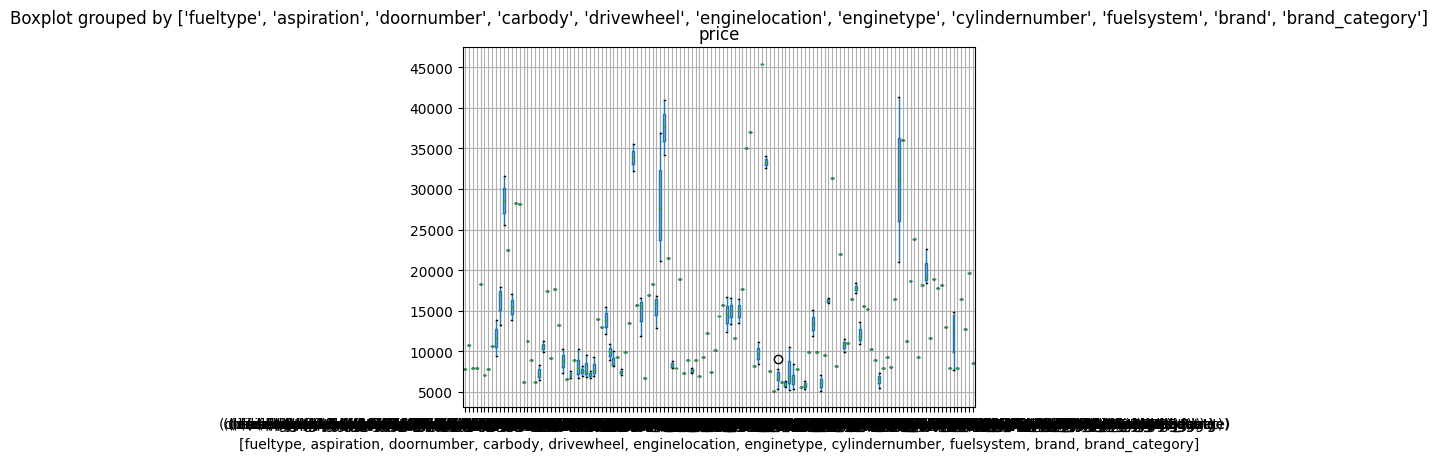

In [37]:
plt.figure(figsize=(10,20))
data.boxplot(column='price',by=categorical_columns)

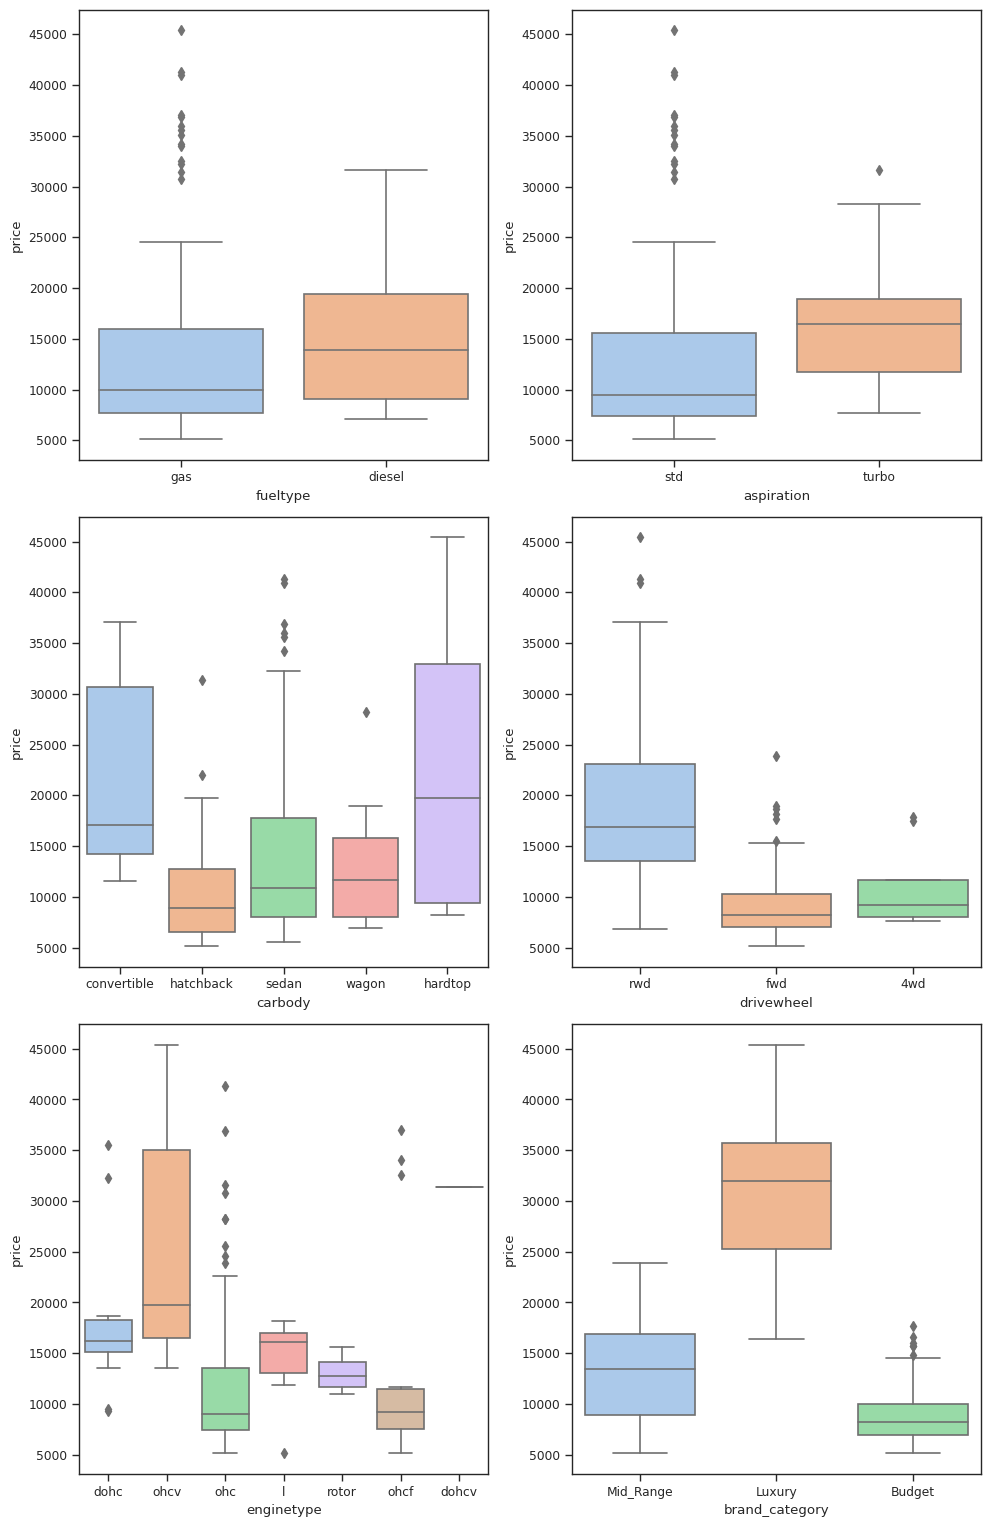

In [38]:
sns.set(style='ticks',context="paper",palette='pastel')
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

In [39]:
corr_matrix=data.corr(numeric_only=True)

In [40]:
corr_matrix.head(15)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_avg_price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.544494
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.609220
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,0.680698
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,0.186132
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,0.725252
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,0.760656
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,0.494625
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,0.009705
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,0.133186
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139,0.648787


In [41]:
### which columns have highest correlation with price ##########

In [42]:

corr_matrix['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
brand_avg_price     0.895520
price               1.000000
Name: price, dtype: float64

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

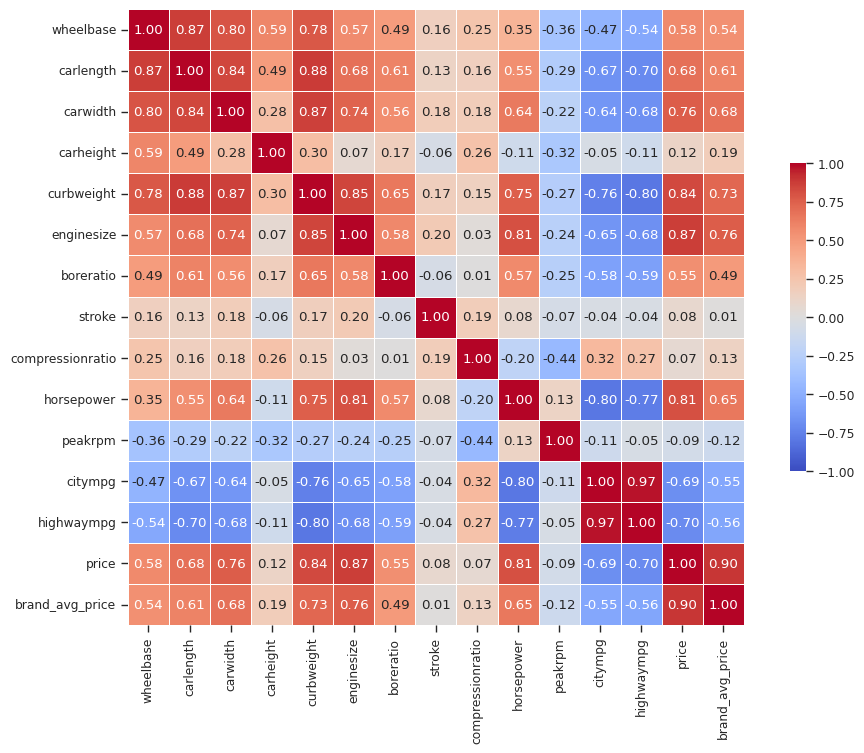

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, 
            annot=True,              # Show numbers
            cmap='coolwarm',         # Color scheme
            center=0,                # Center color map at 0
            square=True,             # Square cells
            fmt='.2f',              # Number format
            linewidths=0.5,         # Width of lines between cells
            cbar_kws={'shrink':.5}, # Colorbar kwargs
            vmin=-1,                # Minimum value for color scaling
            vmax=1) 

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


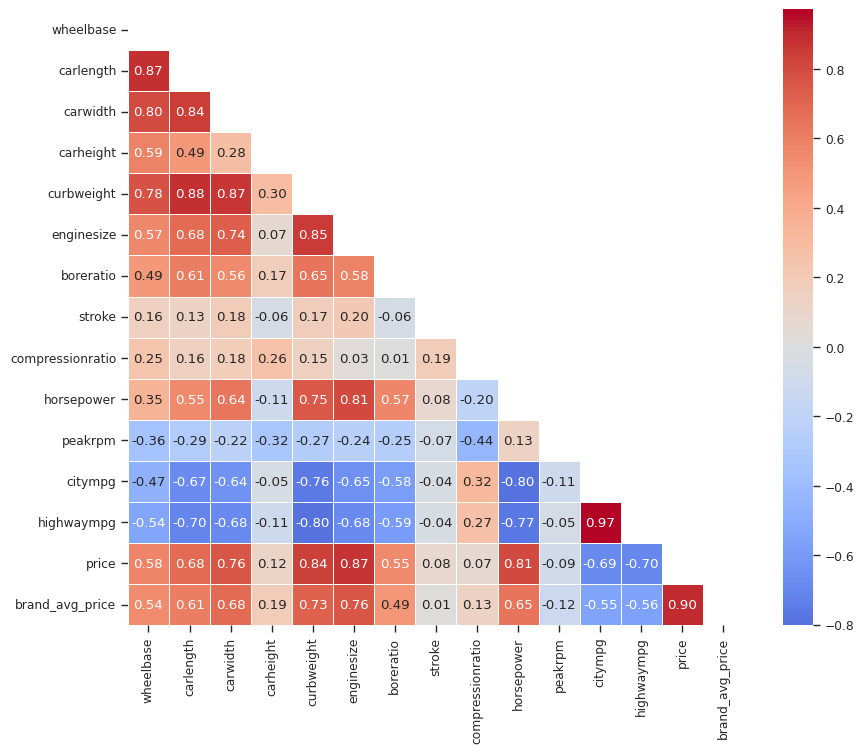

In [44]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


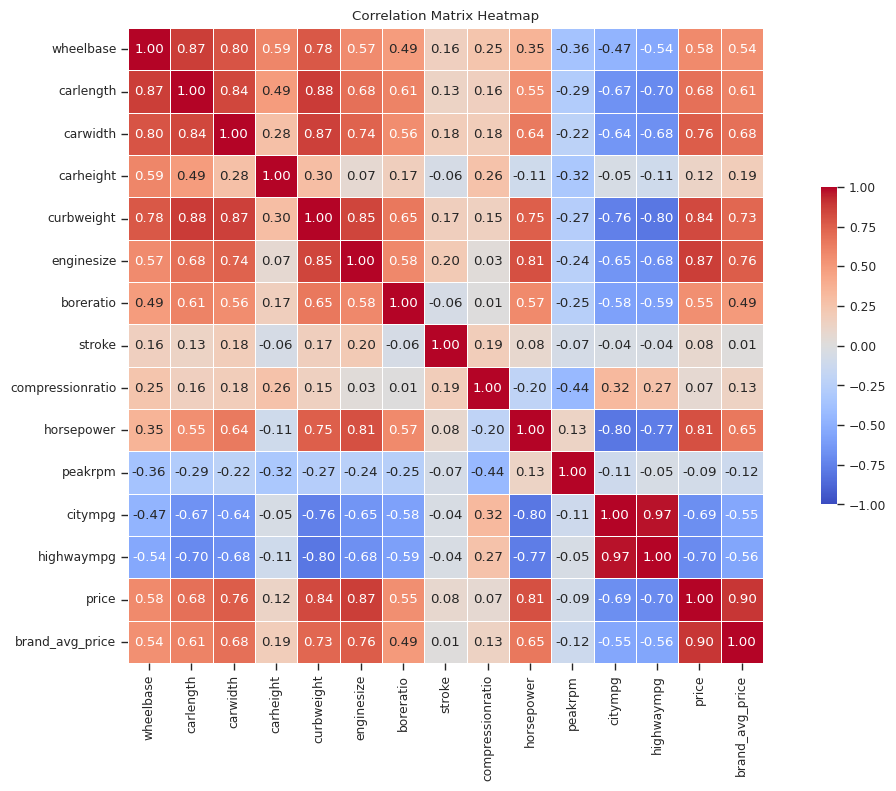

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create heatmap with customization
sns.heatmap(corr_matrix, 
            annot=True,              # Show numbers
            cmap='coolwarm',         # Color scheme
            center=0,                # Center color map at 0
            square=True,             # Square cells
            fmt='.2f',              # Number format
            linewidths=0.5,         # Width of lines between cells
            cbar_kws={'shrink':.5}, # Colorbar kwargs
            vmin=-1,                # Minimum value for color scaling
            vmax=1)                 # Maximum value for color scaling

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

<Axes: >

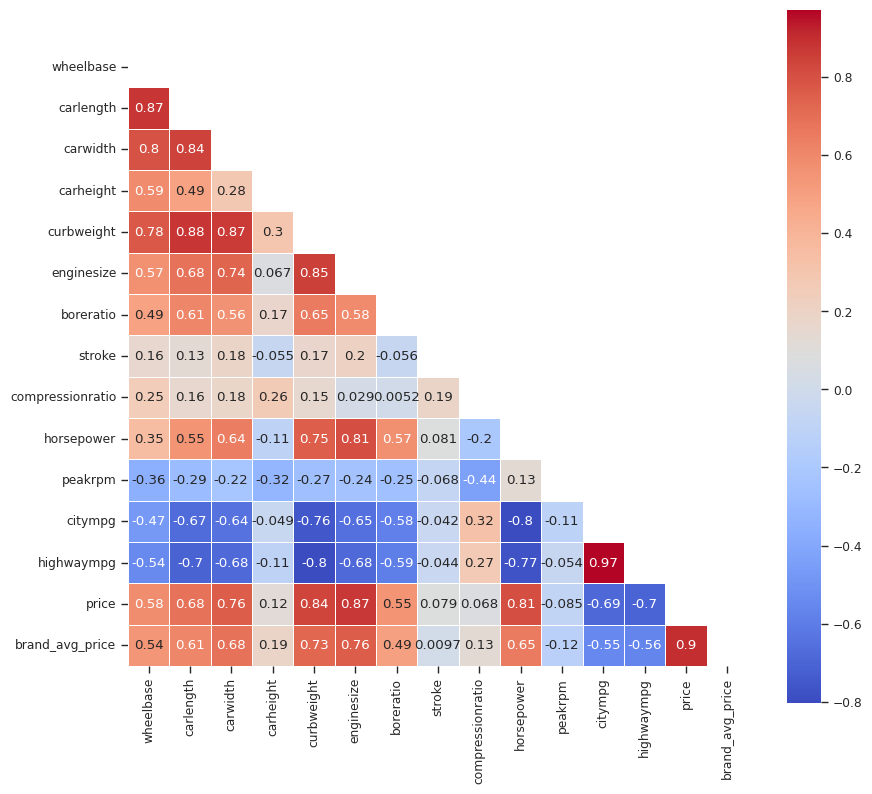

In [46]:
mask=np.triu(np.ones_like(corr_matrix,dtype=bool))
plt.figure(figsize=(10,9))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)

In [47]:
######### Pair Plot #############

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

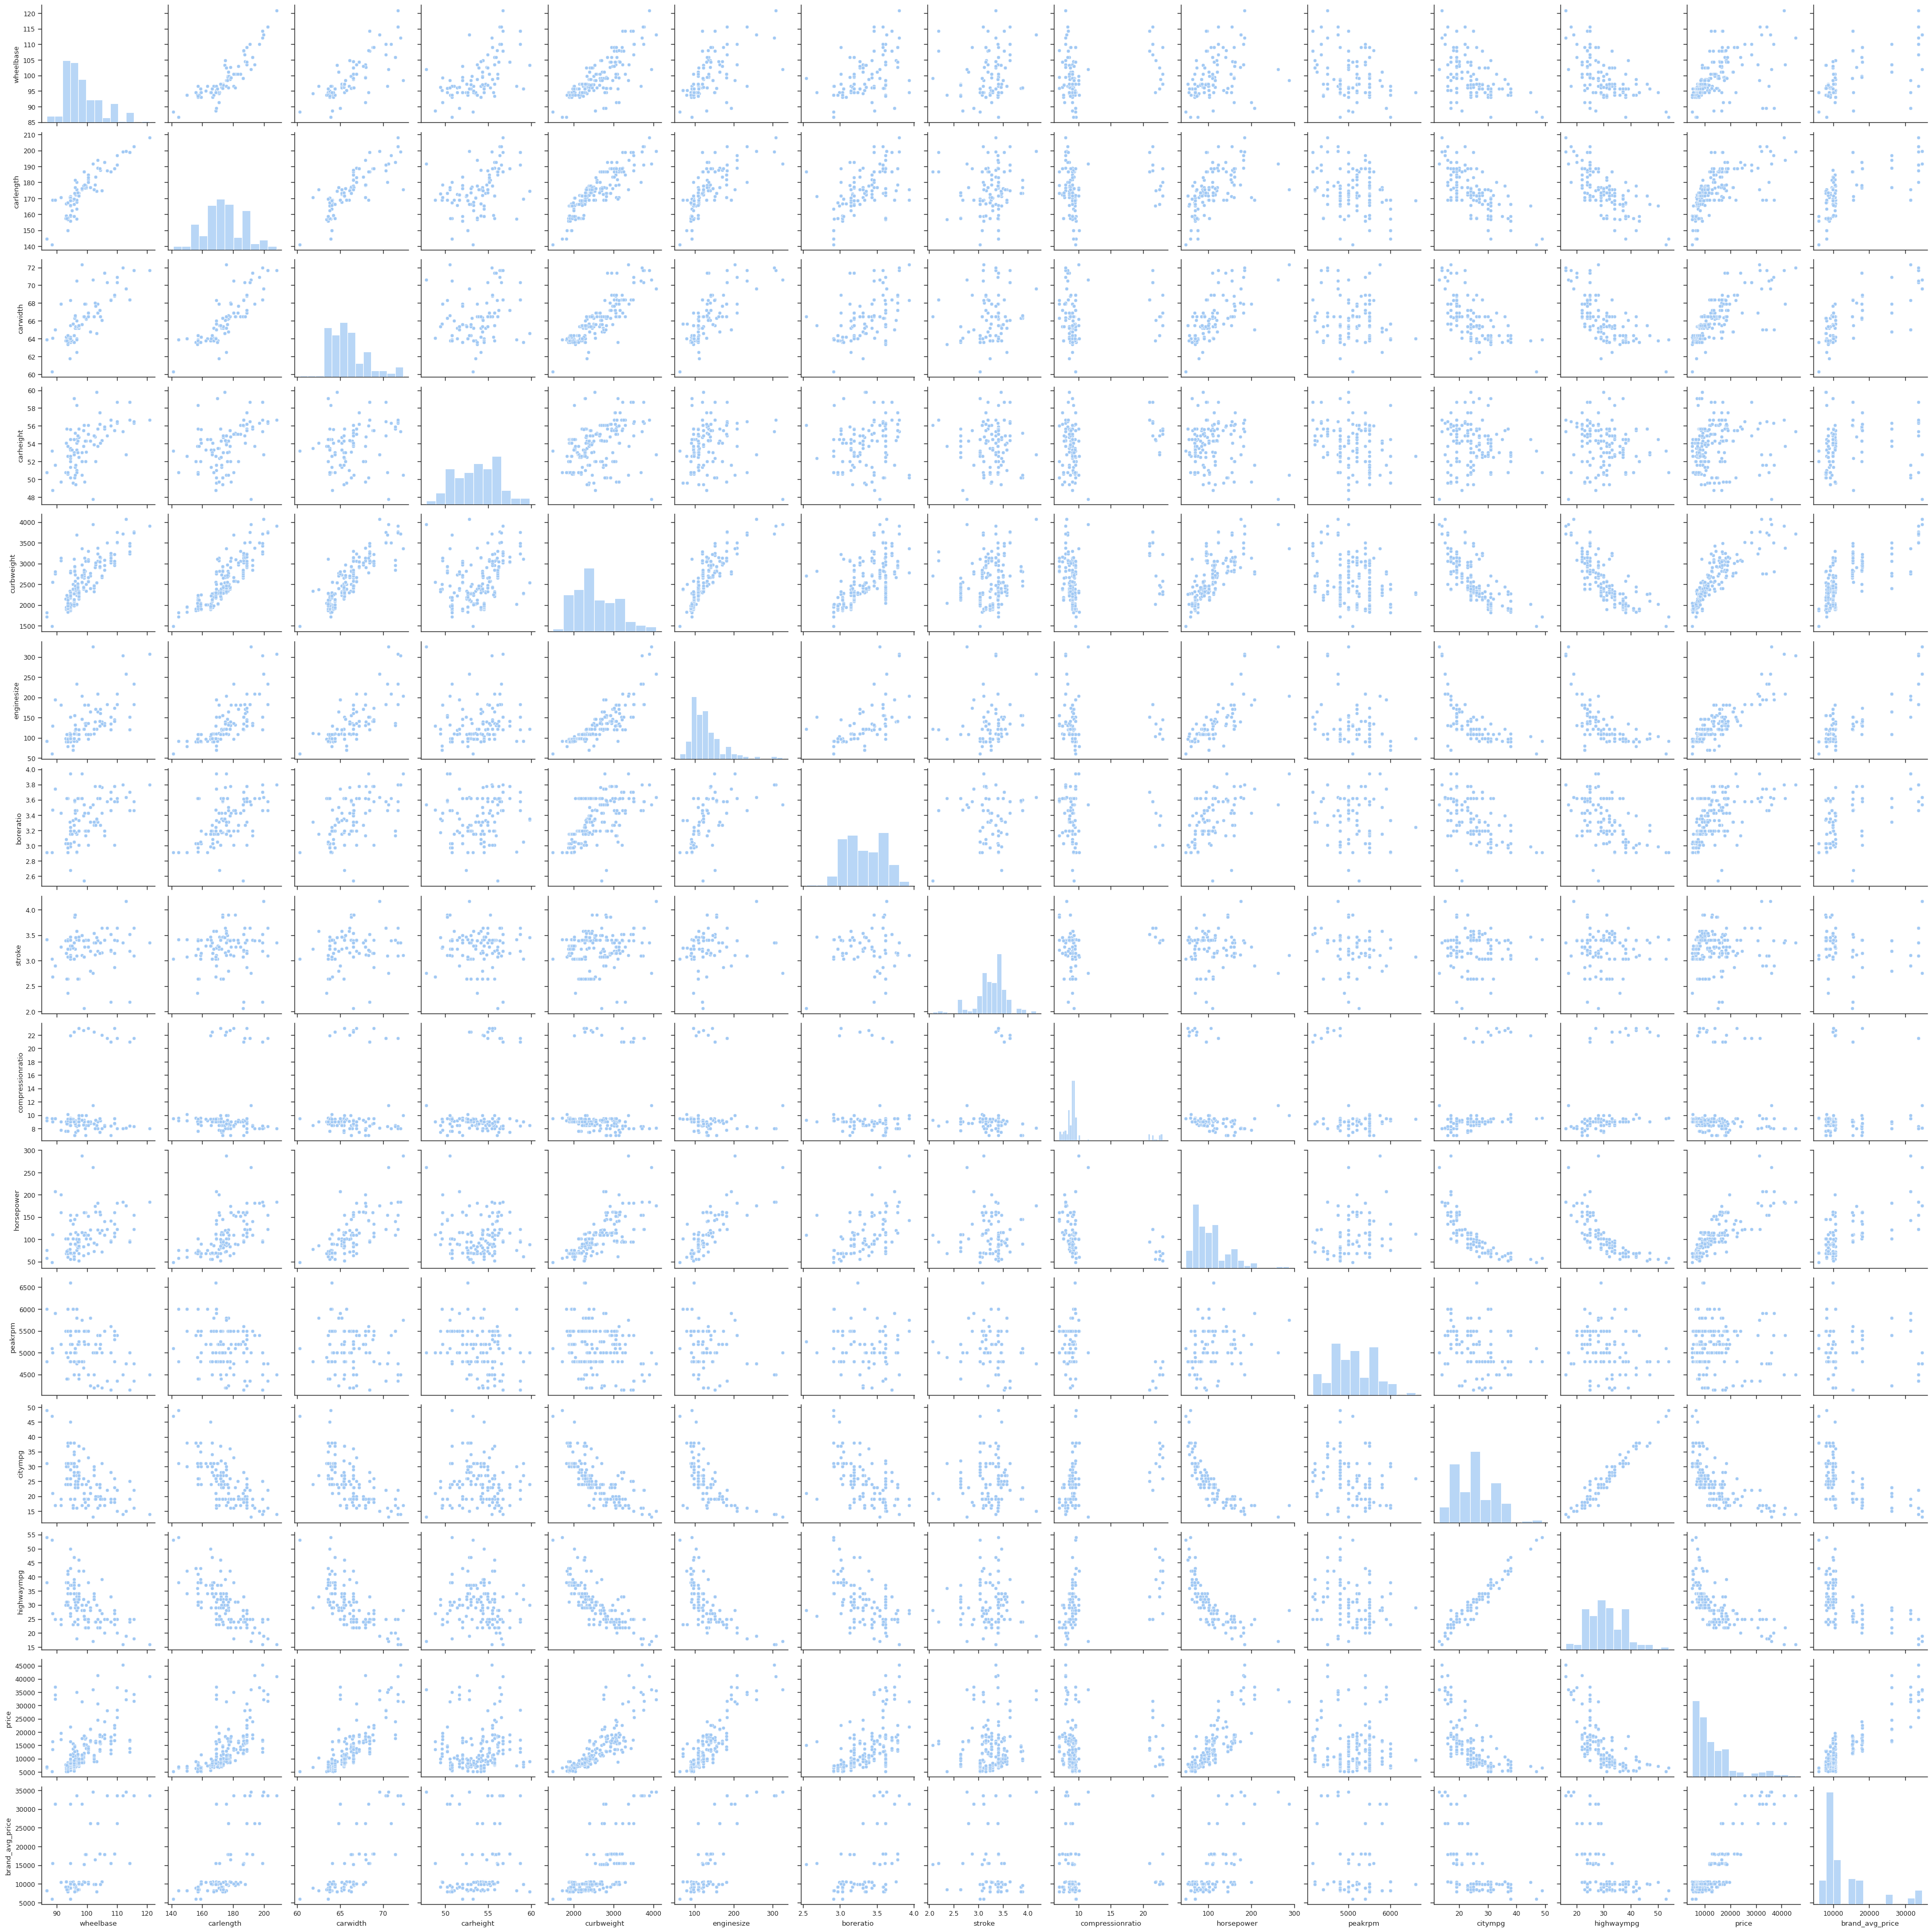

In [48]:
sns.pairplot(data)

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Testing Assumptions for Linear Regression </strong></center>

</div>

In [49]:
#### 1 ) Linearity Assumption #############

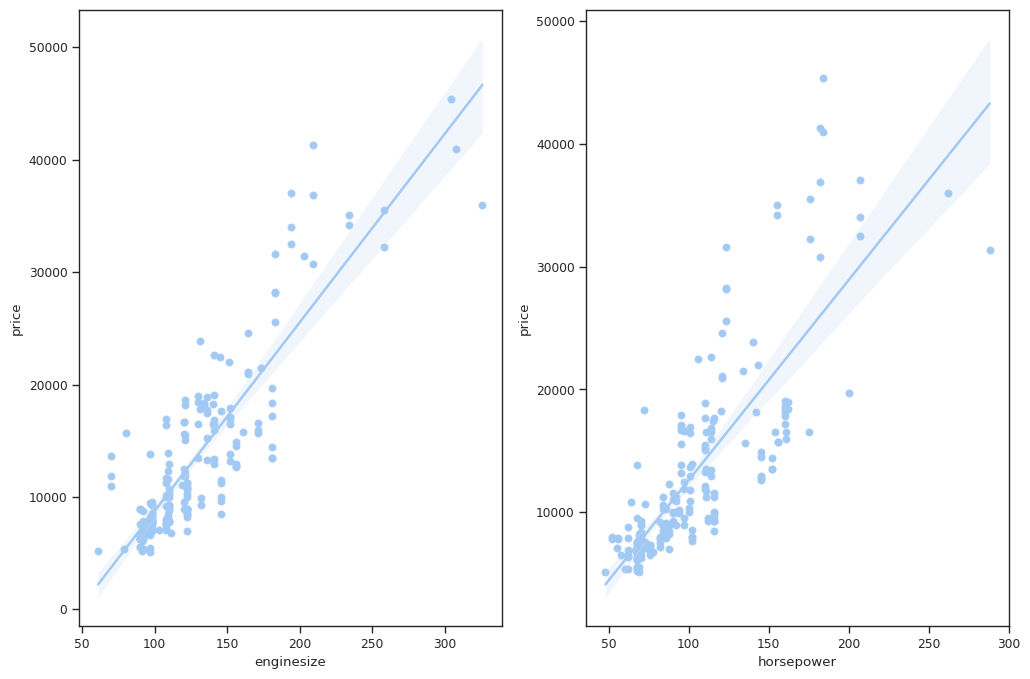

In [50]:
fig, (ax1,ax2)= plt.subplots(figsize=(12,8),ncols=2,sharey=False)

sns.scatterplot(data=data,x='enginesize',y='price',ax=ax1)
sns.regplot(data=data,x='enginesize',y='price',ax=ax1)

sns.scatterplot(x = data.horsepower,y = data.price, ax=ax2)
sns.regplot(x=data.horsepower, y=data.price, ax=ax2);

<Axes: xlabel='curbweight', ylabel='price'>

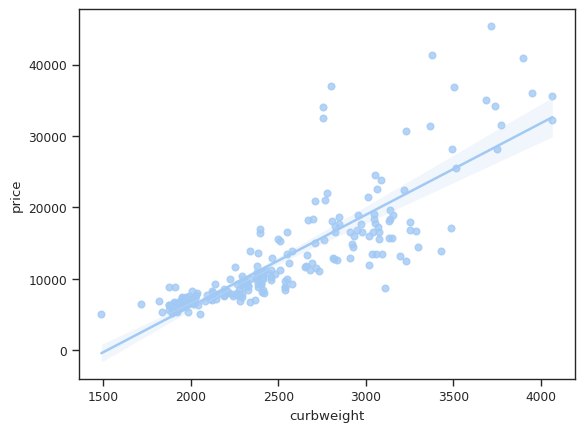

In [51]:
sns.regplot(data=data,x='curbweight',y='price')

In [52]:
#### 2) Homocedasticity ###########

<Axes: xlabel='enginesize', ylabel='price'>

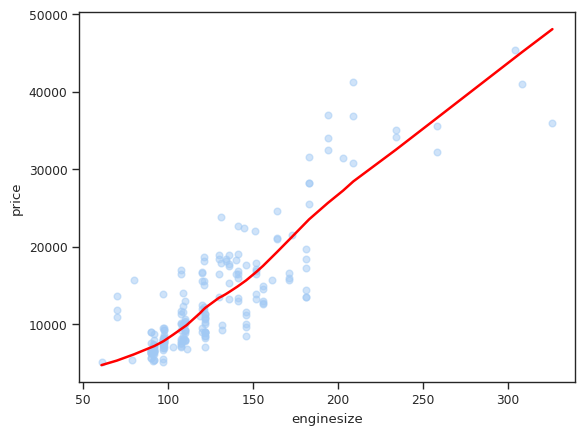

In [53]:
sns.regplot(x='enginesize', y='price', data=data, lowess=True, scatter_kws={'alpha':0.5},
           line_kws={'color': 'red'})

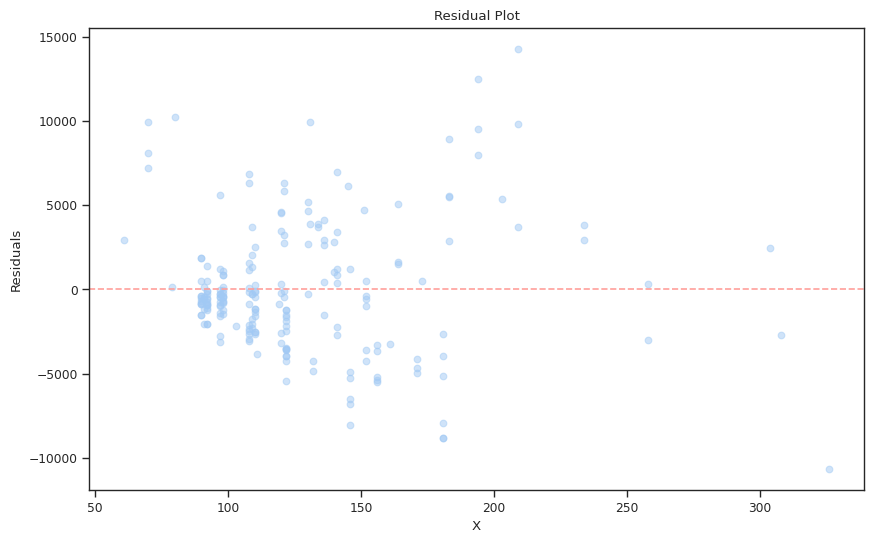

In [54]:
def plot_residuals(x, y, data=None):
    # Fit linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Calculate predicted values
    y_pred = slope * x + intercept
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot residuals
    ax.scatter(x, residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    
    # Labels
    ax.set_xlabel('X')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual Plot')
    
    plt.show()

# Usage
plot_residuals(data['enginesize'], data['price'])

In [55]:
##### Normality ################

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

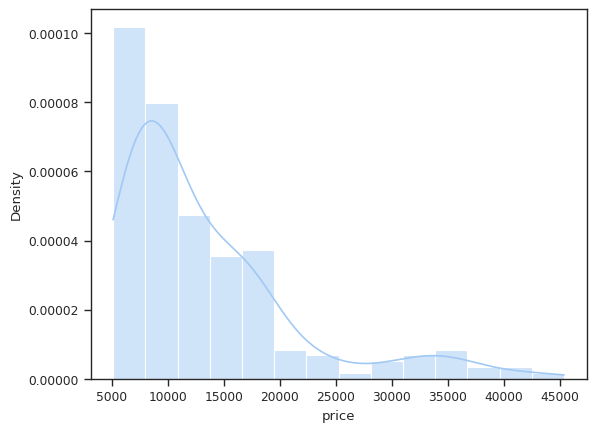

In [56]:
sns.histplot(data.price,kde=True,stat='density')

<ipython-input-57-946c9a37f137>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

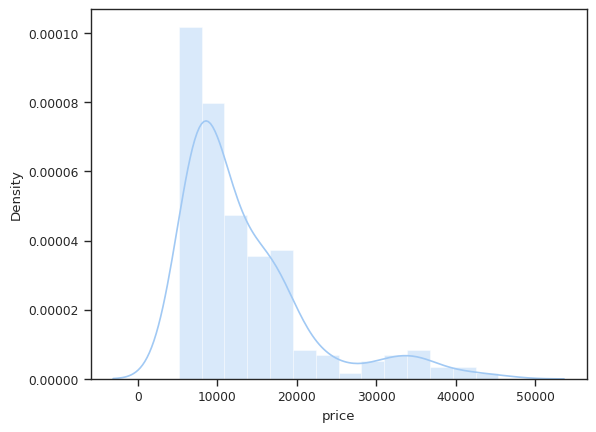

In [57]:
sns.distplot(data.price)

<Axes: >

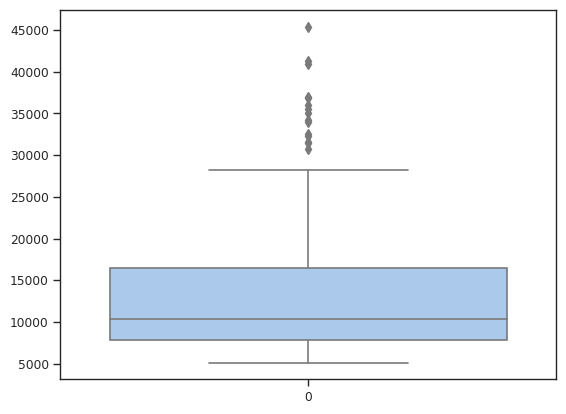

In [58]:
sns.boxplot(data.price)

<ipython-input-59-34051b7cd050>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


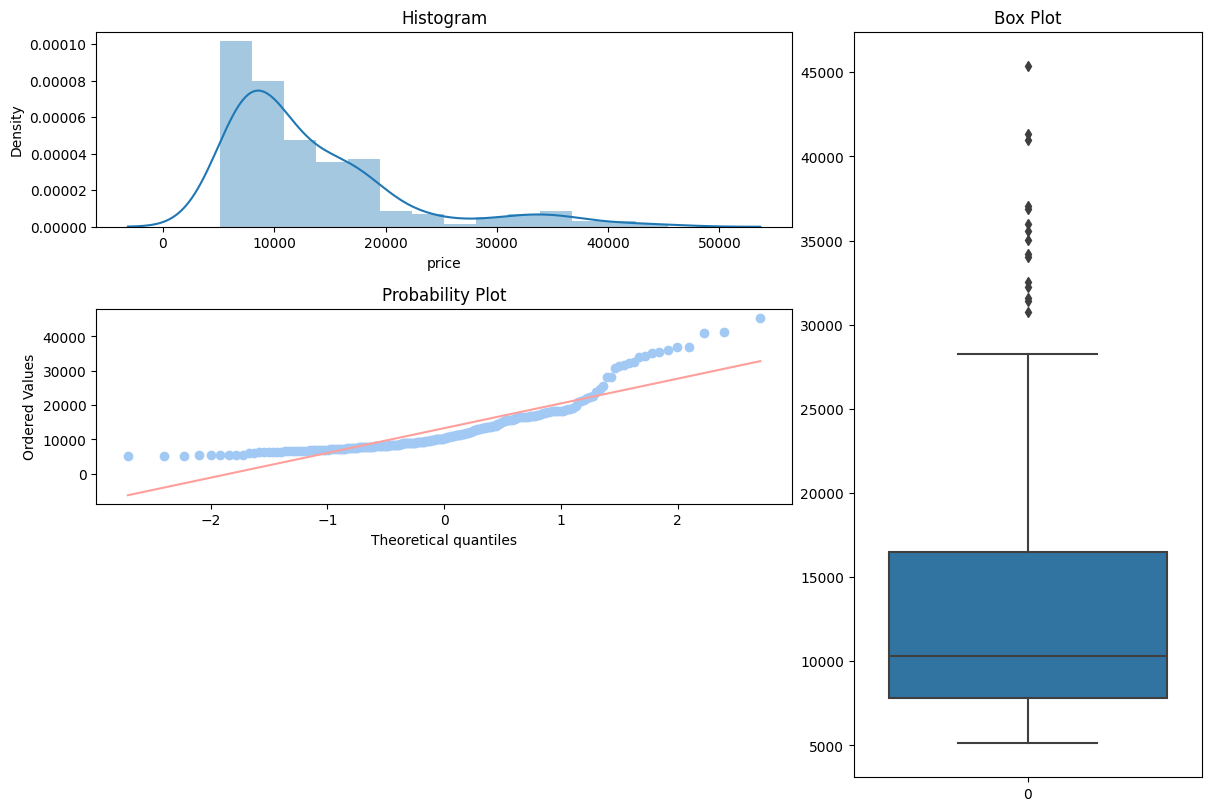

In [59]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('default')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(data, 'price')

In [60]:
previous_data=data.copy()

In [61]:
normaltest(data.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

In [62]:
data2=data.copy(deep=True)

In [63]:
data2['price']=np.log(data['price'])

<ipython-input-59-34051b7cd050>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


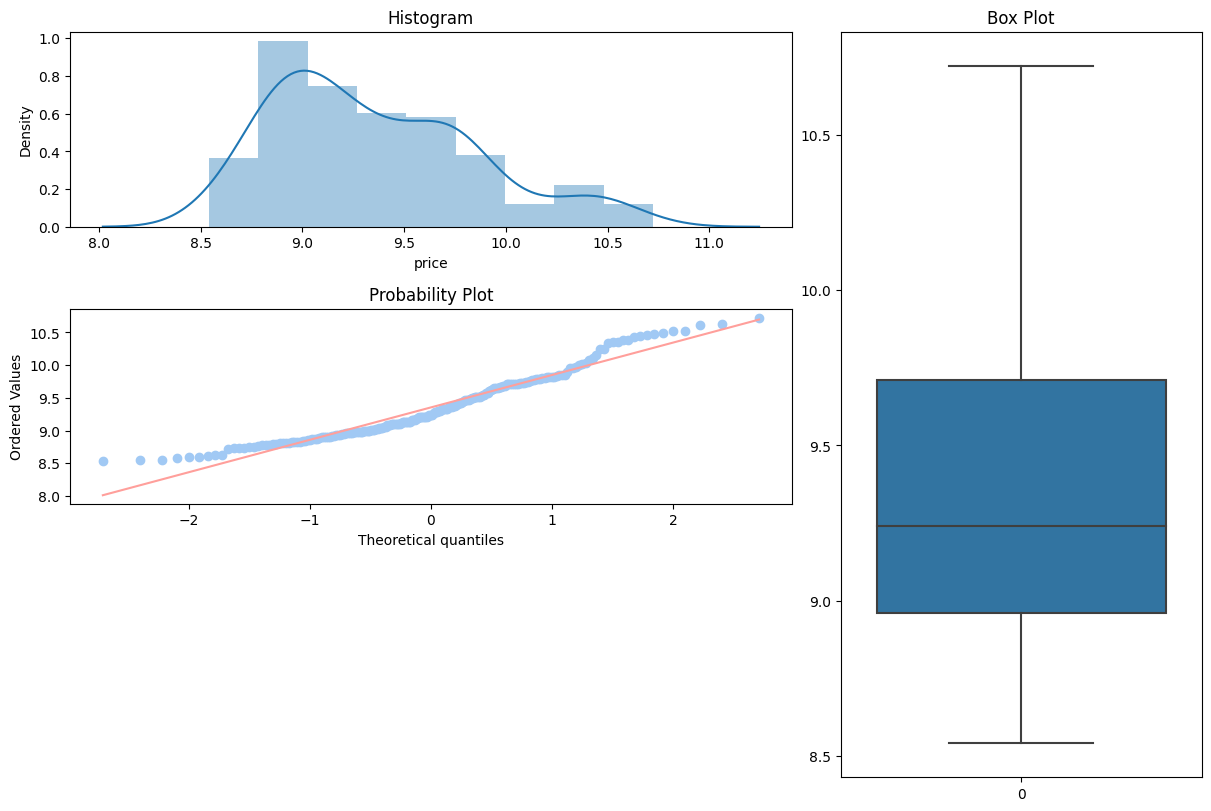

In [64]:
plotting_3_chart(data2,'price')

In [65]:
data['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [66]:
data2['price']

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

In [67]:
data3=data.copy(deep=True)

In [68]:
bc=boxcox(data.price)

In [69]:
data3['price']=bc[0]

In [70]:
data3.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,1.588097,alfa-romero,15498.333333,Mid_Range
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,1.588578,alfa-romero,15498.333333,Mid_Range
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,1.588578,alfa-romero,15498.333333,Mid_Range
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,1.588181,audi,17859.166714,Mid_Range
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,1.588702,audi,17859.166714,Mid_Range


<ipython-input-59-34051b7cd050>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


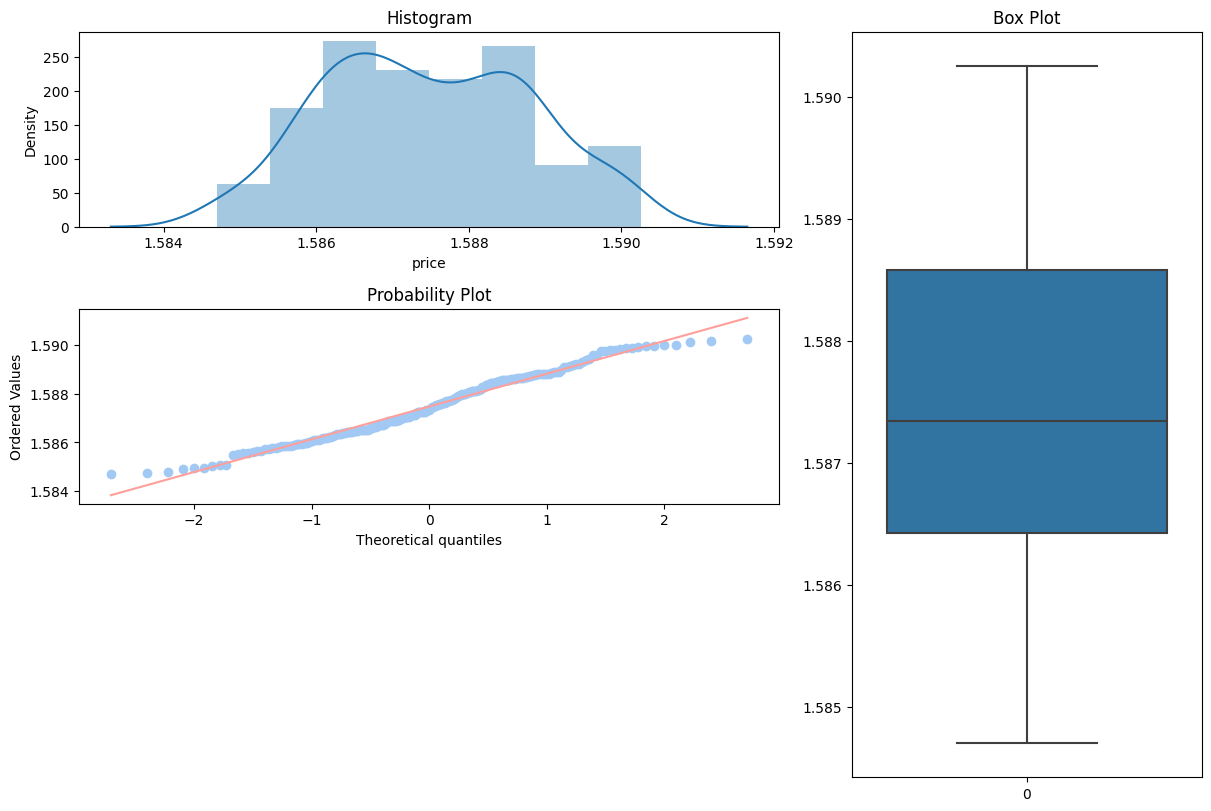

In [71]:
plotting_3_chart(data3,'price')

In [72]:
normaltest(data3.price)

NormaltestResult(statistic=16.727141396099462, pvalue=0.00023321012236787074)

In [73]:
############ MultiCollinearity #########################

In [74]:
corr_matrix=data.corr(numeric_only=True)

<Axes: >

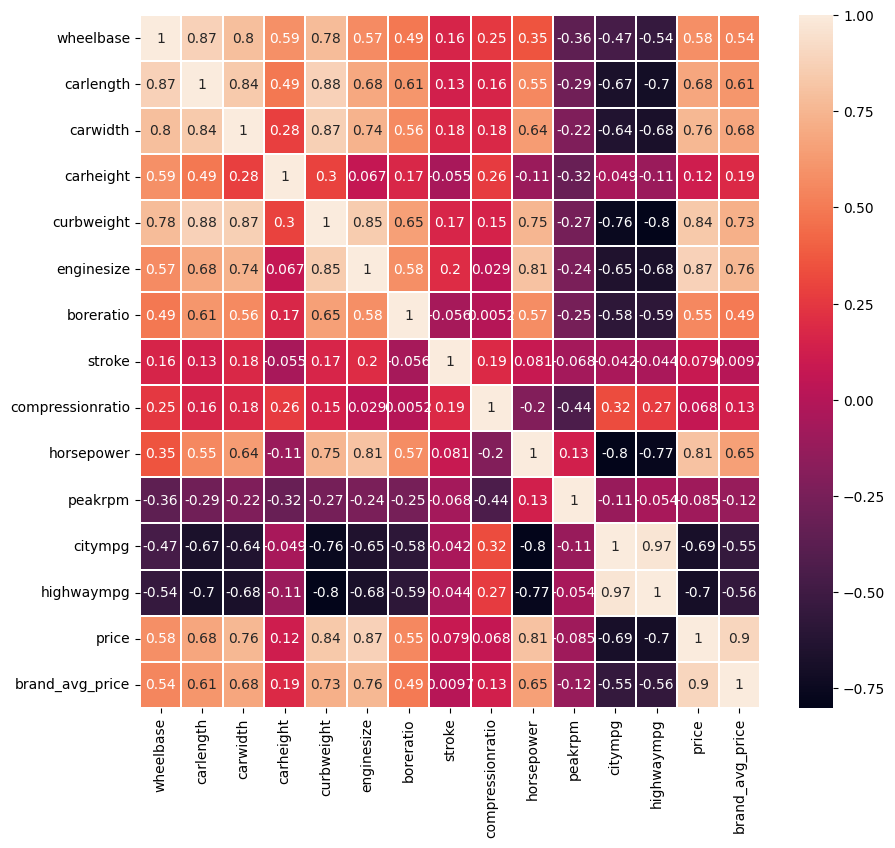

In [75]:
plt.figure(figsize=(10,9))
sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.25
)

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Linear Regression Model </strong></center>

</div>

In [76]:
categorical_columns=list(data.select_dtypes(['category','object']).columns)

In [77]:
categorical_columns

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand',
 'brand_category']

In [78]:
numeric_columns=list(data.select_dtypes(['number']).columns)

In [79]:
numeric_columns

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'brand_avg_price']

In [80]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


In [81]:
categorical_columns = [col for col in selected.columns if selected[col].dtype == 'object']  
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [82]:
numeric_columns=list(set(columns)-set(categorical_columns))

In [83]:
########## Form X #######################

In [84]:
x=selected.drop('price',axis=1)

In [85]:
x.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [86]:
########## Form Y ##############################

In [87]:
y=selected['price'].copy(deep=True)

In [88]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [89]:
######### One hot encoding ###########

In [90]:
one_hot=ColumnTransformer(transformers=[("one_hot",OneHotEncoder(),categorical_columns)], remainder='passthrough')

In [91]:
x=one_hot.fit_transform(x)

In [92]:
type(x)

numpy.ndarray

In [93]:
names=one_hot.get_feature_names_out()

In [94]:
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

In [95]:
#### Using one hot encoder withouit columnbTranformer ############

In [96]:
one=OneHotEncoder()

In [97]:
X_=selected[categorical_columns+numeric_columns]

In [98]:
test=one.fit_transform(X_[categorical_columns])

In [99]:
test=test.toarray()

In [100]:
type(test)

numpy.ndarray

In [101]:
test2=X_[numeric_columns].to_numpy()

In [102]:
X_=np.concatenate((test,test2),axis=1)

In [103]:
X_.shape

(205, 39)

In [104]:
############ using pd get_dummies ####################

In [105]:

X_ = selected[categorical_columns+numeric_columns]

In [106]:
X_.head()

,fueltype,aspiration,carbody,drivewheel,brand_category,enginetype,cylindernumber,boreratio,carlength,carwidth,horsepower,enginesize,citympg,price,wheelbase,highwaympg,curbweight
0,gas,std,convertible,rwd,Mid_Range,dohc,four,3.47,168.8,64.1,111,130,21,13495.0,88.6,27,2548
1,gas,std,convertible,rwd,Mid_Range,dohc,four,3.47,168.8,64.1,111,130,21,16500.0,88.6,27,2548
2,gas,std,hatchback,rwd,Mid_Range,ohcv,six,2.68,171.2,65.5,154,152,19,16500.0,94.5,26,2823
3,gas,std,sedan,fwd,Mid_Range,ohc,four,3.19,176.6,66.2,102,109,24,13950.0,99.8,30,2337
4,gas,std,sedan,4wd,Mid_Range,ohc,five,3.19,176.6,66.4,115,136,18,17450.0,99.4,22,2824


In [107]:
X_['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [108]:
temp=pd.get_dummies(X_['fueltype'],drop_first=True)
test3=pd.concat([data,temp],axis=1)

In [109]:
test3.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category,gas
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Mid_Range,True
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Mid_Range,True
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Mid_Range,True
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,10.0,102,5500,24,30,13950.0,audi,17859.166714,Mid_Range,True
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,8.0,115,5500,18,22,17450.0,audi,17859.166714,Mid_Range,True


In [110]:


def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

X_ = selected[categorical_columns+numeric_columns]
N_column=0

for column in  categorical_columns:
    print(pd.unique(data[column]))
    X_ = dummies(column,X_)



['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['Mid_Range' 'Luxury' 'Budget']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [111]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   boreratio   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   horsepower  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   citympg     205 non-null    int64  
 6   price       205 non-null    float64
 7   wheelbase   205 non-null    float64
 8   highwaympg  205 non-null    int64  
 9   curbweight  205 non-null    int64  
 10  gas         205 non-null    bool   
 11  turbo       205 non-null    bool   
 12  hardtop     205 non-null    bool   
 13  hatchback   205 non-null    bool   
 14  sedan       205 non-null    bool   
 15  wagon       205 non-null    bool   
 16  fwd         205 non-null    bool   
 17  rwd         205 non-null    bool   
 18  Luxury      205 non-null    bool   
 19  Mid_Range   205 non-null    b

In [112]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Mid_Range',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [113]:
df=pd.DataFrame(data=x,columns=colunm_names)

In [114]:
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0


In [115]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.30,random_state=0)

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 40 to 172
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   diesel              143 non-null    float64
 1   gas                 143 non-null    float64
 2   std                 143 non-null    float64
 3   turbo               143 non-null    float64
 4   convertible         143 non-null    float64
 5   hardtop             143 non-null    float64
 6   hatchback           143 non-null    float64
 7   sedan               143 non-null    float64
 8   wagon               143 non-null    float64
 9   4wd                 143 non-null    float64
 10  fwd                 143 non-null    float64
 11  rwd                 143 non-null    float64
 12  category_Budget     143 non-null    float64
 13  category_Luxury     143 non-null    float64
 14  category_Mid_Range  143 non-null    float64
 15  dohc                143 non-null    float64
 16  dohcv       

In [117]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 52 to 135
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   diesel              62 non-null     float64
 1   gas                 62 non-null     float64
 2   std                 62 non-null     float64
 3   turbo               62 non-null     float64
 4   convertible         62 non-null     float64
 5   hardtop             62 non-null     float64
 6   hatchback           62 non-null     float64
 7   sedan               62 non-null     float64
 8   wagon               62 non-null     float64
 9   4wd                 62 non-null     float64
 10  fwd                 62 non-null     float64
 11  rwd                 62 non-null     float64
 12  category_Budget     62 non-null     float64
 13  category_Luxury     62 non-null     float64
 14  category_Mid_Range  62 non-null     float64
 15  dohc                62 non-null     float64
 16  dohcv        

In [118]:
####### Linear Regression ##########################

In [119]:
lm=LinearRegression()

In [120]:
X_train=ss.fit_transform(X_train)

NameError: name 'ss' is not defined

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
############### Making Prediction ##################

In [ ]:
X_test=ss.transform(X_test)

In [ ]:
car_price_predictions=lm.predict(X_test)

In [ ]:
car_price_predictions

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Metrics Evaluation </strong></center>

</div>

In [ ]:
mse=mean_squared_error(y_test,car_price_predictions)
mse

In [ ]:
lm.score(X_test,y_test)

In [ ]:
r2_score(y_test,car_price_predictions)

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> Pipeline Object </strong></center>

</div>

In [ ]:
steps=[
    ('scaler',StandardScaler()),
    ('lm',LinearRegression())
]

In [ ]:
pipe=Pipeline(steps=steps)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse


In [ ]:
r2_score(car_price_predictions, y_test)

<div  style="min-height: 10px; background-color: lightblue; padding: 20px; border: 2px solid blue; border-radius: 10px; width: 900px; margin: 20px auto;">
    
  <center><strong> My attempt </strong></center>

</div>

In [143]:
X = selected[categorical_columns+numeric_columns]

In [144]:
X.head()

,fueltype,aspiration,carbody,drivewheel,brand_category,enginetype,cylindernumber,boreratio,carlength,carwidth,horsepower,enginesize,citympg,price,wheelbase,highwaympg,curbweight
0,gas,std,convertible,rwd,Mid_Range,dohc,four,3.47,168.8,64.1,111,130,21,13495.0,88.6,27,2548
1,gas,std,convertible,rwd,Mid_Range,dohc,four,3.47,168.8,64.1,111,130,21,16500.0,88.6,27,2548
2,gas,std,hatchback,rwd,Mid_Range,ohcv,six,2.68,171.2,65.5,154,152,19,16500.0,94.5,26,2823
3,gas,std,sedan,fwd,Mid_Range,ohc,four,3.19,176.6,66.2,102,109,24,13950.0,99.8,30,2337
4,gas,std,sedan,4wd,Mid_Range,ohc,five,3.19,176.6,66.4,115,136,18,17450.0,99.4,22,2824


In [145]:
y=X['price'].to_frame()
x=X.drop('price',axis=1)


In [138]:
x.head()

,fueltype,aspiration,carbody,drivewheel,brand_category,enginetype,cylindernumber,boreratio,carlength,carwidth,horsepower,enginesize,citympg,wheelbase,highwaympg,curbweight
0,gas,std,convertible,rwd,Mid_Range,dohc,four,3.47,168.8,64.1,111,130,21,88.6,27,2548
1,gas,std,convertible,rwd,Mid_Range,dohc,four,3.47,168.8,64.1,111,130,21,88.6,27,2548
2,gas,std,hatchback,rwd,Mid_Range,ohcv,six,2.68,171.2,65.5,154,152,19,94.5,26,2823
3,gas,std,sedan,fwd,Mid_Range,ohc,four,3.19,176.6,66.2,102,109,24,99.8,30,2337
4,gas,std,sedan,4wd,Mid_Range,ohc,five,3.19,176.6,66.4,115,136,18,99.4,22,2824


In [146]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [140]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [147]:
X_train.head()

,fueltype,aspiration,carbody,drivewheel,brand_category,enginetype,cylindernumber,boreratio,carlength,carwidth,horsepower,enginesize,citympg,wheelbase,highwaympg,curbweight
110,diesel,turbo,wagon,rwd,Mid_Range,l,four,3.70,198.9,68.4,95,152,25,114.2,25,3430
89,gas,std,sedan,fwd,Mid_Range,ohc,four,3.15,165.3,63.8,69,97,31,94.5,37,1889
92,gas,std,sedan,fwd,Mid_Range,ohc,four,3.15,165.3,63.8,69,97,31,94.5,37,1938
94,gas,std,sedan,fwd,Mid_Range,ohc,four,3.15,165.3,63.8,69,97,31,94.5,37,1951
115,gas,std,sedan,rwd,Mid_Range,l,four,3.46,186.7,68.4,97,120,19,107.9,24,3075


In [148]:
X_test.head()

,fueltype,aspiration,carbody,drivewheel,brand_category,enginetype,cylindernumber,boreratio,carlength,carwidth,horsepower,enginesize,citympg,wheelbase,highwaympg,curbweight
59,gas,std,hatchback,fwd,Mid_Range,ohc,four,3.39,177.8,66.5,84,122,26,98.8,32,2385
101,gas,std,sedan,fwd,Mid_Range,ohcv,six,3.43,181.7,66.5,152,181,17,100.4,22,3095
21,gas,std,hatchback,fwd,Budget,ohc,four,2.97,157.3,63.8,68,90,37,93.7,41,1876
176,gas,std,sedan,fwd,Budget,ohc,four,3.31,175.6,66.5,92,122,27,102.4,32,2414
188,gas,std,sedan,fwd,Mid_Range,ohc,four,3.19,171.7,65.5,100,109,26,97.3,32,2300


In [149]:
y_transforms=PowerTransformer(method='box-cox')

In [150]:
y_train_bc=y_transforms.fit_transform(y_train)

In [151]:
x_transforms=ColumnTransformer(transformers=
    [
        ('one_hot',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ],
                             remainder='passthrough'
)

In [152]:
pipe=Pipeline(
    [
        ('transforms',x_transforms),
        ('scaler',StandardScaler()),
        ('lr',LinearRegression())
    ]
)

In [153]:
pipe.fit(X_train,y_train_bc)

Pipeline(steps=[('transforms',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'brand_category',
                                                   'enginetype',
                                                   'cylindernumber'])])),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

In [154]:
y_pred_bc=car_price_predictions=pipe.predict(X_test)

In [155]:
y_pred=y_transforms.inverse_transform(y_pred_bc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [157]:
y_pred

array([[ 9418.47892571],
       [15859.47042801],
       [ 6079.42777509],
       [ 9435.04655744],
       [10540.56415818],
       [ 8693.96480152],
       [ 9980.37697734],
       [14649.12627292],
       [11596.77855594],
       [ 7032.07404455],
       [38348.079741  ],
       [ 8314.08968359],
       [13312.73395793],
       [ 7623.06779863],
       [ 7444.54055577],
       [ 8272.42701544],
       [23049.69971656],
       [ 9958.95725259],
       [14392.78799923],
       [19038.04487692],
       [11487.38173979],
       [15315.58802632],
       [11090.29671282],
       [14884.71850914],
       [15414.42916839],
       [10259.66233483],
       [10541.95880717],
       [ 8842.55271958],
       [ 7347.54243388],
       [14008.46733434],
       [ 7284.85842928],
       [ 6946.80545934],
       [ 6868.06902342],
       [13518.38247612],
       [ 4834.53688744],
       [19652.09156907],
       [29774.00151357],
       [ 8279.86485668],
       [ 7735.40192359],
       [14358.79006979],


In [156]:
r2_score(y_pred,y_test)

0.8764102485194127

In [158]:
X = selected[categorical_columns+numeric_columns]
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
steps=[('one_hot',one_hot), ('scaler', StandardScaler()), ('lm',  LinearRegression())]

pipe = Pipeline(steps=steps)
pipe.fit(X,y)
car_price_predictions=pipe.predict(X)
r2_score(car_price_predictions, y)

1.0